<a href="https://colab.research.google.com/github/Ganeshpy3/projects/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.layers import  Dense, Flatten,Conv2D,MaxPooling2D,Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy

In [4]:
import cv2

In [5]:
os.listdir("/content/drive/MyDrive/Data/Good Morning")[:5]

['IMG-20210327-WA0003.jpg',
 'IMG-20210329-WA0008.jpg',
 'IMG-20210509-WA0006.jpg',
 'IMG-20210614-WA0002.jpg',
 'IMG-20210615-WA0001.jpg']

In [6]:
X=[]
Y=[]

In [9]:
Normal_pics_path="/content/drive/MyDrive/Data/Normal pics/"
good_morning_path="/content/drive/MyDrive/Data/Good Morning/"

In [10]:
for i in os.listdir(Normal_pics_path):
  images=cv2.imread(Normal_pics_path+str(i))
  #Scaling
  imge=cv2.resize(images/255,(224,224))
  #reshaping
  finalimage=imge.reshape(1,224,224,3)
  X.append(finalimage.reshape(-1))
  Y.append(0)



In [11]:
for i in os.listdir(good_morning_path):
  images=cv2.imread(good_morning_path+str(i))
  imge=cv2.resize(images/255,(224,224))
  finalimage=imge.reshape(1,224,224,3)
  X.append(finalimage.reshape(-1))
  Y.append(1)



In [12]:
from sklearn.utils import shuffle

In [13]:
X=pd.DataFrame(X)

In [14]:
Y=pd.DataFrame(Y)

In [15]:
X.shape

(265, 150528)

In [16]:
index=np.arange(X.shape[0])

In [17]:
np.random.shuffle(index)

In [18]:
index

array([236,   2, 116,  33,  97, 200,  46,  28, 217, 102,   0, 232, 109,
       260, 244,  47, 212, 146, 169, 237, 252, 148,  82,  44,  35, 136,
        69, 108,  81, 158, 137, 230, 174, 167, 112,  67,  91, 211, 184,
        30, 152, 193,  18, 223,  51, 161,  11, 264, 228, 119, 172, 129,
         4,  45, 126, 181,   5, 111, 149,  87,  78, 141,  39,   9, 144,
       117, 220, 241, 205, 123, 162, 104, 201,  22,  34,  26, 153, 256,
       227, 145,  56,  72,  93, 114, 192, 121,  80,  68, 224, 213, 113,
       120, 257,  86, 157,  42, 218, 110,  88,  96,  36, 247, 258, 242,
       246, 151,  75, 251, 206, 179, 197,  53, 127,  32,  31, 186,   3,
        99, 203,  90, 106, 261, 143,  77,  85,  37, 130, 209, 154,  84,
       191,  14, 234,  74,  20, 176, 219, 225, 147,  40,  63, 195,  43,
        25, 164, 170,  23,  16, 175, 155, 185, 243,  76, 250,  92, 204,
        95, 238, 101, 107, 173,  29,  27, 198, 215,   8, 194,  52,  24,
       159, 240,  17,  19, 226, 190, 229,  21, 177,  15, 132,  9

In [19]:
x=X.iloc[index]

In [20]:
x.head()

0         1         2       ...   150525    150526    150527
236  0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000
2    0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000
116  0.129412  0.325490  0.929412  ...  0.87451  0.898039  0.988235
33   0.000000  0.000000  0.001943  ...  1.00000  1.000000  0.998022
97   0.603922  0.337255  0.168627  ...  1.00000  1.000000  1.000000

[5 rows x 150528 columns]

In [21]:
y=Y.iloc[index]

In [22]:
y.head()

0
236  1
2    0
116  0
33   0
97   0

In [23]:
Xval=x.values

In [24]:
Xval.shape

(265, 150528)

In [25]:
yval=y.values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(Xval,yval,test_size=0.3)

In [28]:
xtrain.shape

(185, 150528)

In [29]:
Xtrain=xtrain.reshape(185,224,224,3)

In [30]:
xtest.shape

(80, 150528)

In [31]:
Xtest=xtest.reshape(80,224,224,3)

In [117]:
model=Sequential()


model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))


model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=1024,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(1000,activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(500,activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 224, 224, 64)      832       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 128)     32896     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 56, 56, 256)      

[1]


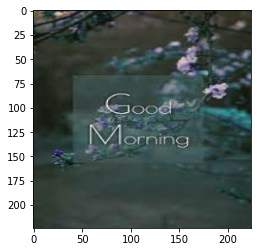

In [118]:
i=1
plt.imshow(Xtrain[i])
print(ytrain[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1]


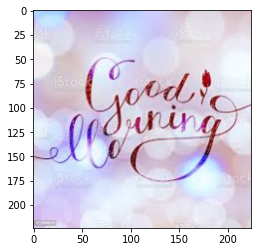

In [119]:
i=2
plt.imshow(Xtrain[i])
print(ytrain[i])

In [120]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [121]:
model.fit(Xtrain,ytrain,epochs=30)

Epoch 1/30
6/6 [==============================] - 2s 159ms/step - loss: 4.4368 - accuracy: 0.5622
Epoch 2/30
6/6 [==============================] - 1s 156ms/step - loss: 0.7029 - accuracy: 0.5730
Epoch 3/30
6/6 [==============================] - 1s 155ms/step - loss: 0.6803 - accuracy: 0.5730
Epoch 4/30
6/6 [==============================] - 1s 152ms/step - loss: 0.6836 - accuracy: 0.5730
Epoch 5/30
6/6 [==============================] - 1s 154ms/step - loss: 0.6788 - accuracy: 0.5730
Epoch 6/30
6/6 [==============================] - 1s 153ms/step - loss: 0.6755 - accuracy: 0.5730
Epoch 7/30
6/6 [==============================] - 1s 154ms/step - loss: 0.6693 - accuracy: 0.5730
Epoch 8/30
6/6 [==============================] - 1s 155ms/step - loss: 0.6703 - accuracy: 0.5730
Epoch 9/30
6/6 [==============================] - 1s 154ms/step - loss: 0.6664 - accuracy: 0.5730
Epoch 10/30
6/6 [==============================] - 1s 154ms/step - loss: 0.6607 - accuracy: 0.5784
Epoch 11/30
6/6 [==

In [122]:
yp=model.predict(Xtest)

In [123]:
YP=yp>0.5

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
accuracy_score(ytest,YP)

0.8125

In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
confusion_matrix(ytest,YP)

array([[34,  8],
       [ 7, 31]])

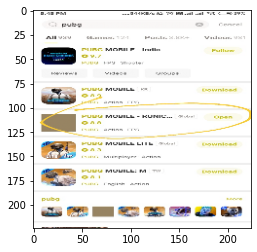

not a good morning wish
____________________________________________________________________________________________________


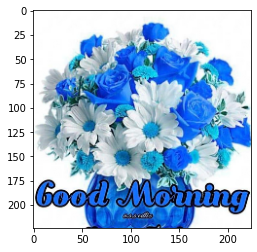

yes it is good morning wish
____________________________________________________________________________________________________


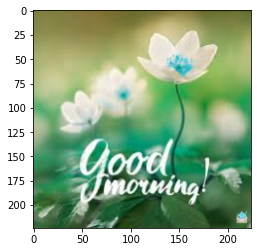

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


yes it is good morning wish
____________________________________________________________________________________________________


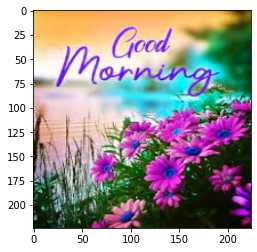

yes it is good morning wish
____________________________________________________________________________________________________


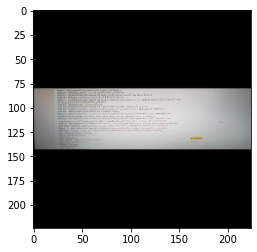

not a good morning wish
____________________________________________________________________________________________________


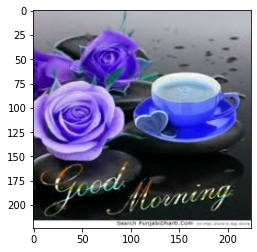

yes it is good morning wish
____________________________________________________________________________________________________


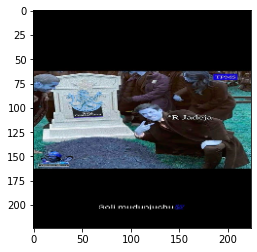

not a good morning wish
____________________________________________________________________________________________________


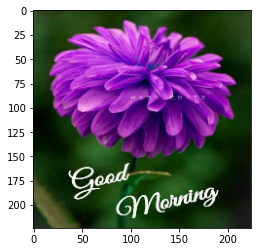

yes it is good morning wish
____________________________________________________________________________________________________


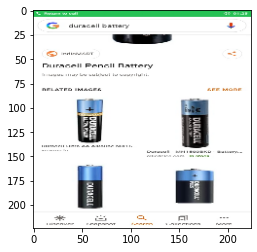

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not a good morning wish
____________________________________________________________________________________________________


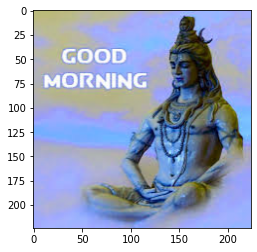

yes it is good morning wish
____________________________________________________________________________________________________


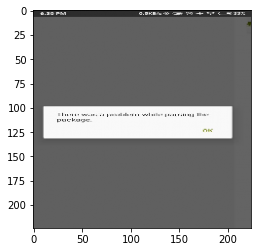

not a good morning wish
____________________________________________________________________________________________________


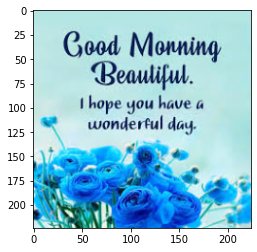

yes it is good morning wish
____________________________________________________________________________________________________


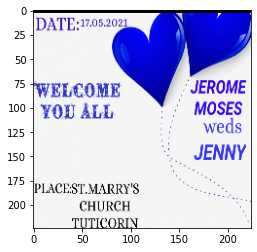

not a good morning wish
____________________________________________________________________________________________________


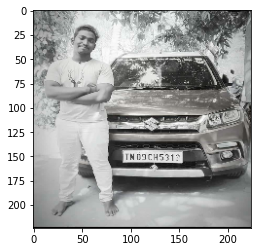

not a good morning wish
____________________________________________________________________________________________________


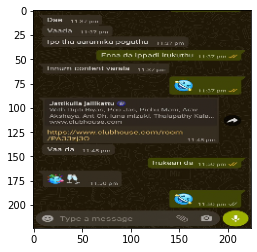

not a good morning wish
____________________________________________________________________________________________________


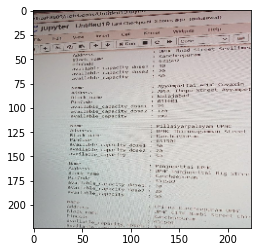

not a good morning wish
____________________________________________________________________________________________________


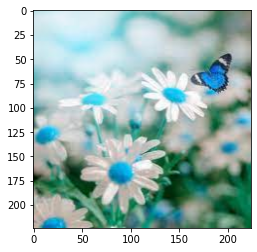

yes it is good morning wish
____________________________________________________________________________________________________


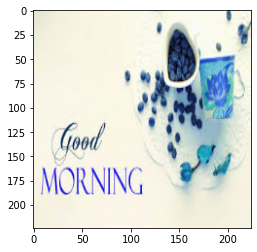

yes it is good morning wish
____________________________________________________________________________________________________


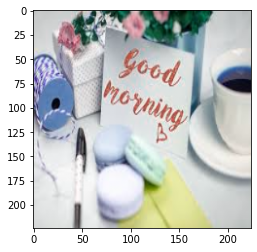

yes it is good morning wish
____________________________________________________________________________________________________


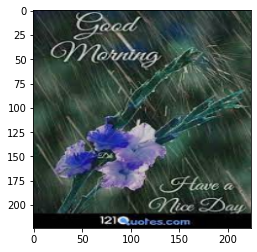

yes it is good morning wish
____________________________________________________________________________________________________


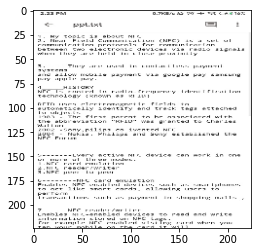

not a good morning wish
____________________________________________________________________________________________________


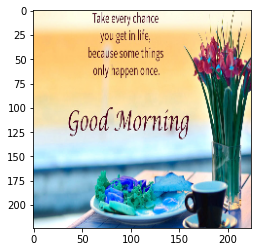

not a good morning wish
____________________________________________________________________________________________________


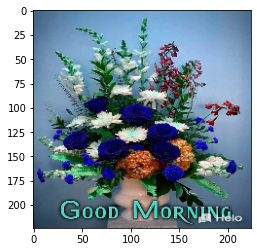

not a good morning wish
____________________________________________________________________________________________________


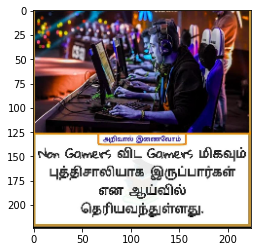

not a good morning wish
____________________________________________________________________________________________________


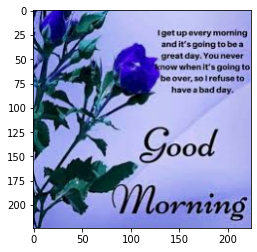

yes it is good morning wish
____________________________________________________________________________________________________


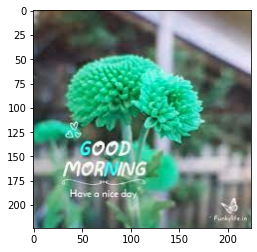

yes it is good morning wish
____________________________________________________________________________________________________


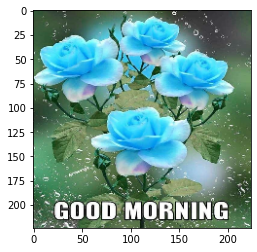

yes it is good morning wish
____________________________________________________________________________________________________


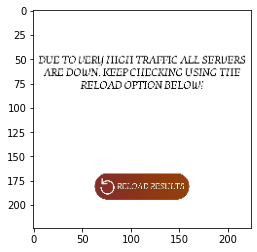

not a good morning wish
____________________________________________________________________________________________________


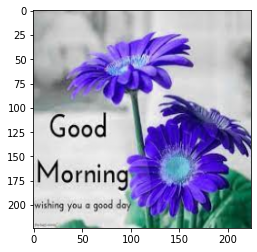

yes it is good morning wish
____________________________________________________________________________________________________


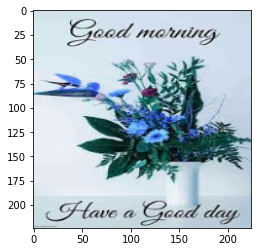

not a good morning wish
____________________________________________________________________________________________________


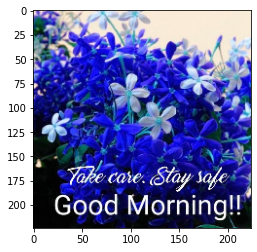

yes it is good morning wish
____________________________________________________________________________________________________


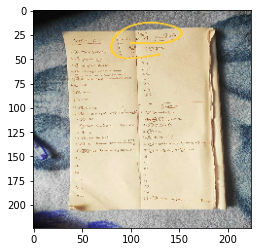

not a good morning wish
____________________________________________________________________________________________________


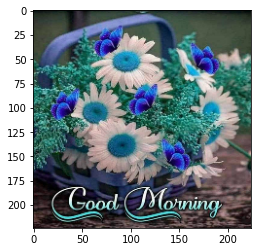

yes it is good morning wish
____________________________________________________________________________________________________


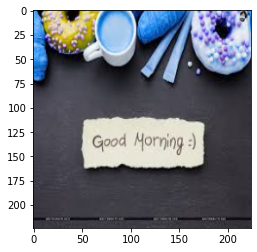

yes it is good morning wish
____________________________________________________________________________________________________


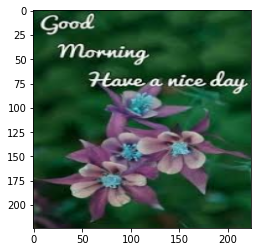

yes it is good morning wish
____________________________________________________________________________________________________


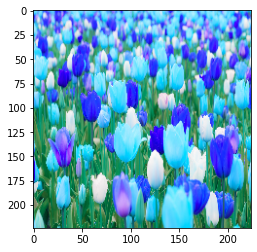

yes it is good morning wish
____________________________________________________________________________________________________


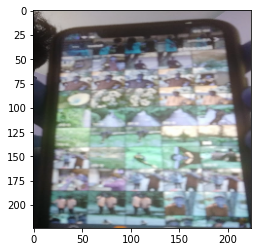

yes it is good morning wish
____________________________________________________________________________________________________


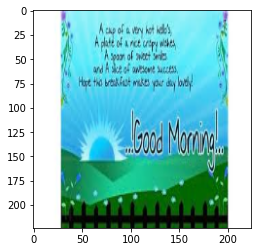

yes it is good morning wish
____________________________________________________________________________________________________


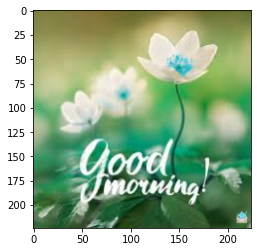

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


yes it is good morning wish
____________________________________________________________________________________________________


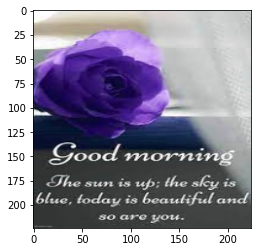

yes it is good morning wish
____________________________________________________________________________________________________


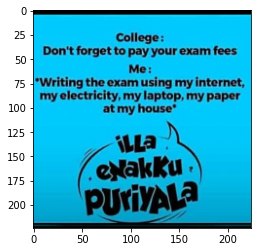

yes it is good morning wish
____________________________________________________________________________________________________


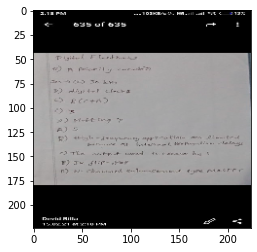

not a good morning wish
____________________________________________________________________________________________________


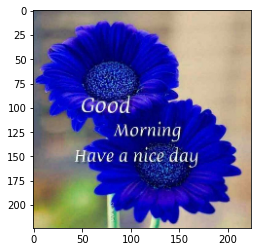

yes it is good morning wish
____________________________________________________________________________________________________


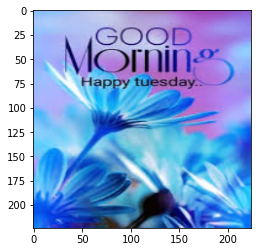

yes it is good morning wish
____________________________________________________________________________________________________


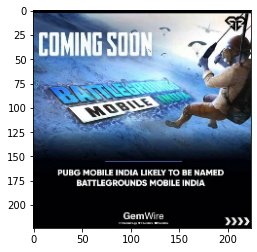

yes it is good morning wish
____________________________________________________________________________________________________


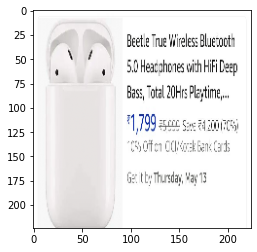

not a good morning wish
____________________________________________________________________________________________________


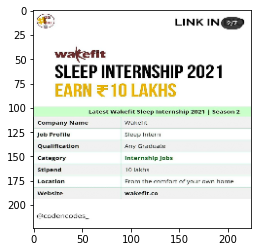

not a good morning wish
____________________________________________________________________________________________________


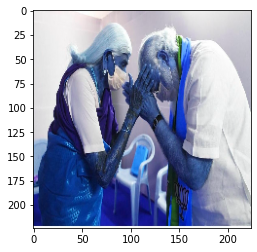

yes it is good morning wish
____________________________________________________________________________________________________


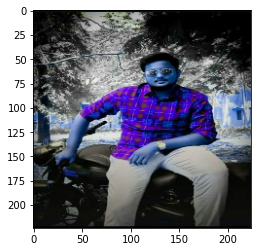

not a good morning wish
____________________________________________________________________________________________________


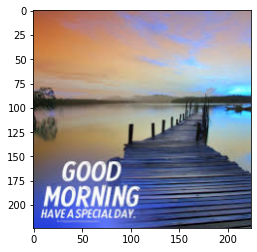

yes it is good morning wish
____________________________________________________________________________________________________


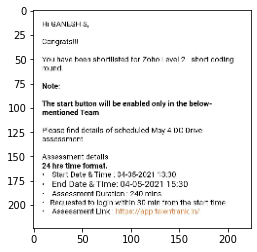

not a good morning wish
____________________________________________________________________________________________________


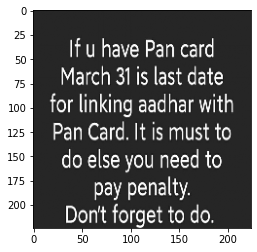

not a good morning wish
____________________________________________________________________________________________________


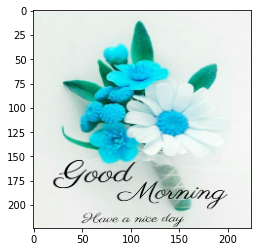

yes it is good morning wish
____________________________________________________________________________________________________


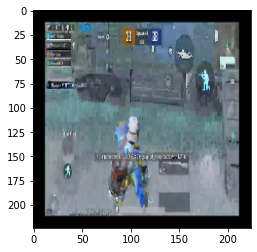

not a good morning wish
____________________________________________________________________________________________________


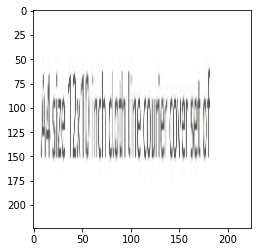

not a good morning wish
____________________________________________________________________________________________________


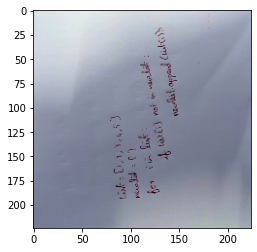

yes it is good morning wish
____________________________________________________________________________________________________


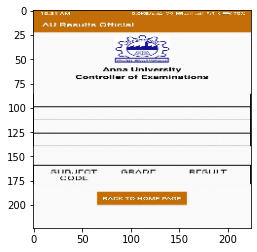

not a good morning wish
____________________________________________________________________________________________________


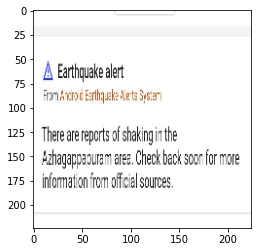

not a good morning wish
____________________________________________________________________________________________________


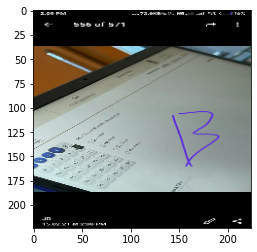

not a good morning wish
____________________________________________________________________________________________________


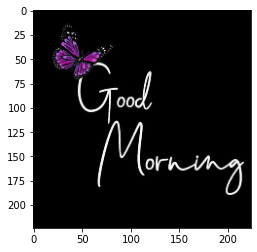

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not a good morning wish
____________________________________________________________________________________________________


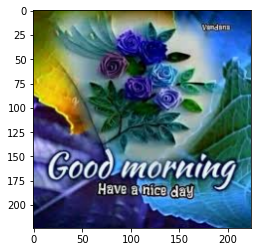

yes it is good morning wish
____________________________________________________________________________________________________


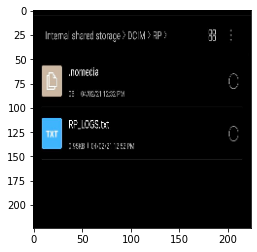

not a good morning wish
____________________________________________________________________________________________________


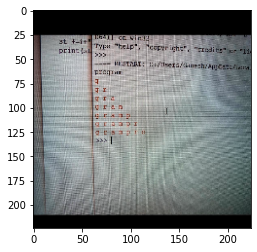

not a good morning wish
____________________________________________________________________________________________________


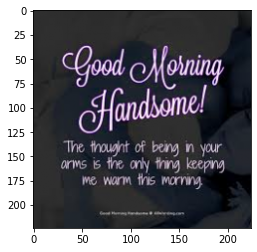

not a good morning wish
____________________________________________________________________________________________________


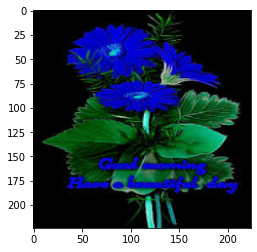

yes it is good morning wish
____________________________________________________________________________________________________


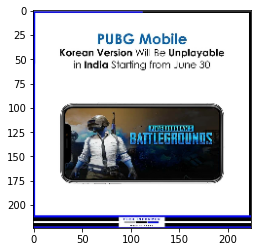

not a good morning wish
____________________________________________________________________________________________________


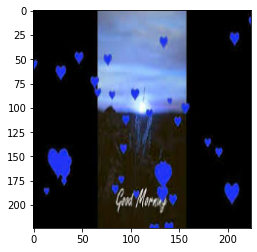

yes it is good morning wish
____________________________________________________________________________________________________


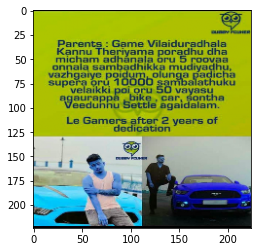

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not a good morning wish
____________________________________________________________________________________________________


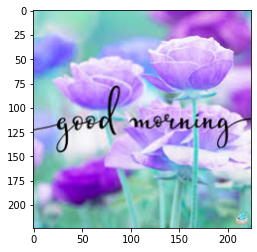

yes it is good morning wish
____________________________________________________________________________________________________


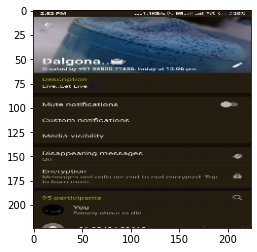

not a good morning wish
____________________________________________________________________________________________________


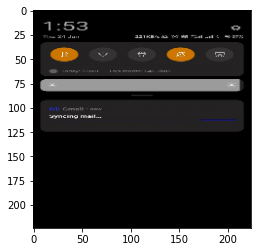

not a good morning wish
____________________________________________________________________________________________________


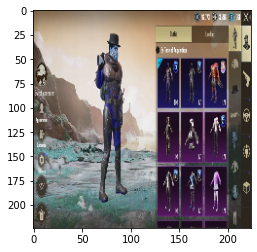

not a good morning wish
____________________________________________________________________________________________________


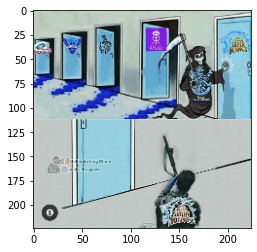

not a good morning wish
____________________________________________________________________________________________________


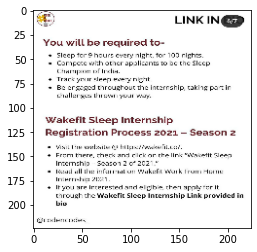

not a good morning wish
____________________________________________________________________________________________________


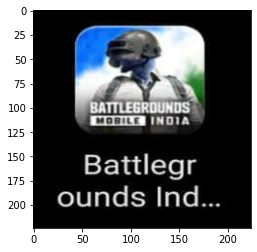

yes it is good morning wish
____________________________________________________________________________________________________


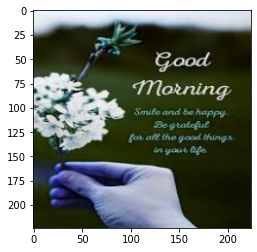

not a good morning wish
____________________________________________________________________________________________________


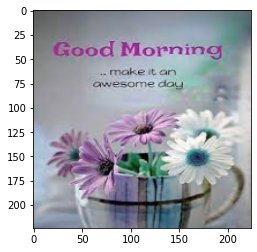

not a good morning wish
____________________________________________________________________________________________________


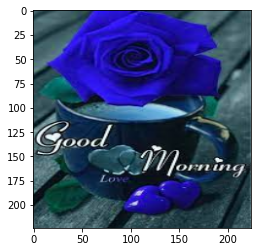

yes it is good morning wish
____________________________________________________________________________________________________


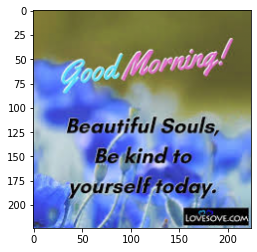

yes it is good morning wish
____________________________________________________________________________________________________


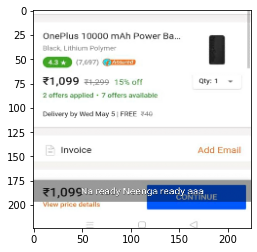

not a good morning wish
____________________________________________________________________________________________________


In [128]:
for i in range(len(Xtest)):
  plt.imshow(Xtest[i])
  plt.show()
  print(["yes it is good morning wish" if YP[i]==1 else "not a good morning wish"][0])
  print("_"*100)
